In [57]:
# import np, pd and matplotlib and seaborn
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
from sklearn.preprocessing import StandardScaler  # type: ignore
from imblearn.over_sampling import RandomOverSampler  # type: ignore

In [38]:
cols = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
]
df = pd.read_csv(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Python\Code\Practice\machine_learning\tmp_data_sets\magic04.data",
    header=None,
    names=cols,
)

In [39]:
# using loc|iloc to change class column to int if g then = 1 else = 0
df["class"] = df['class'].apply(lambda x: 1 if x == "g" else 0)

df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


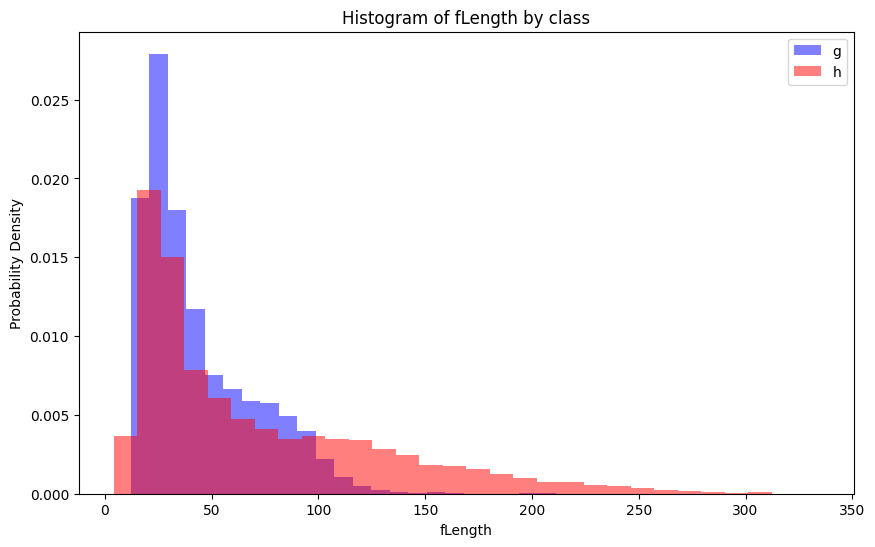

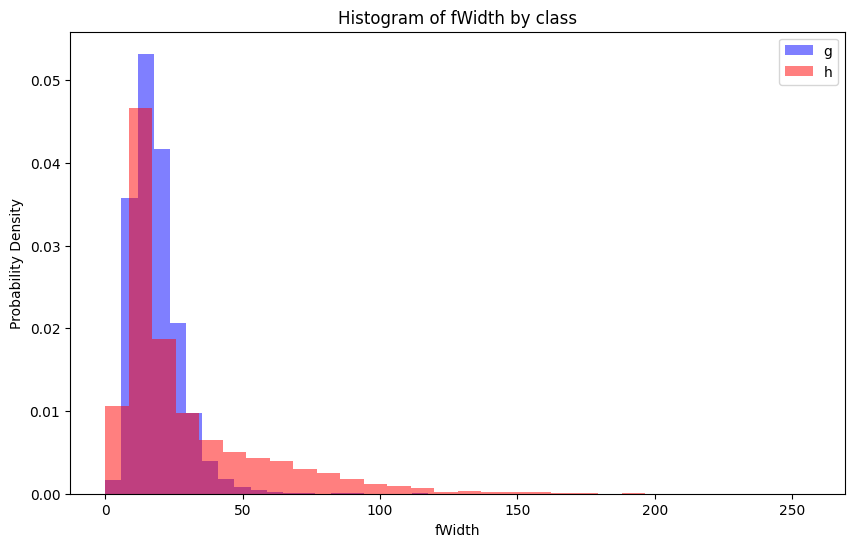

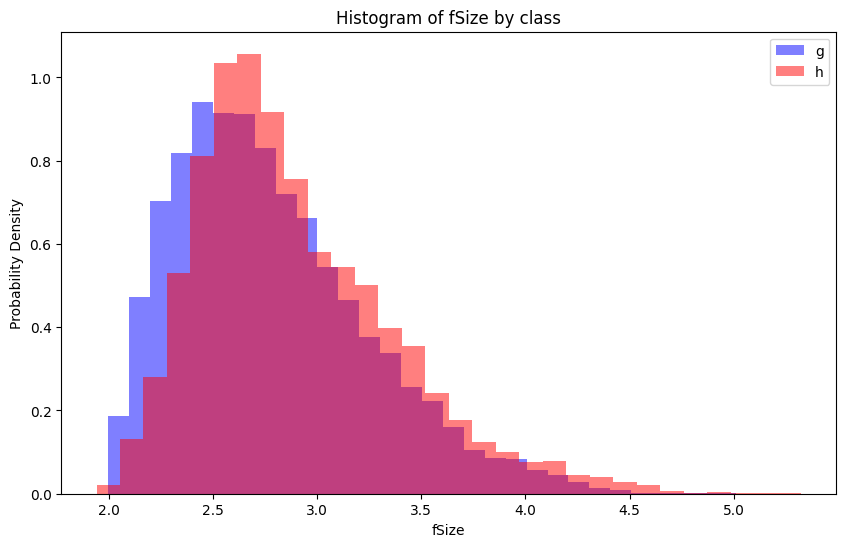

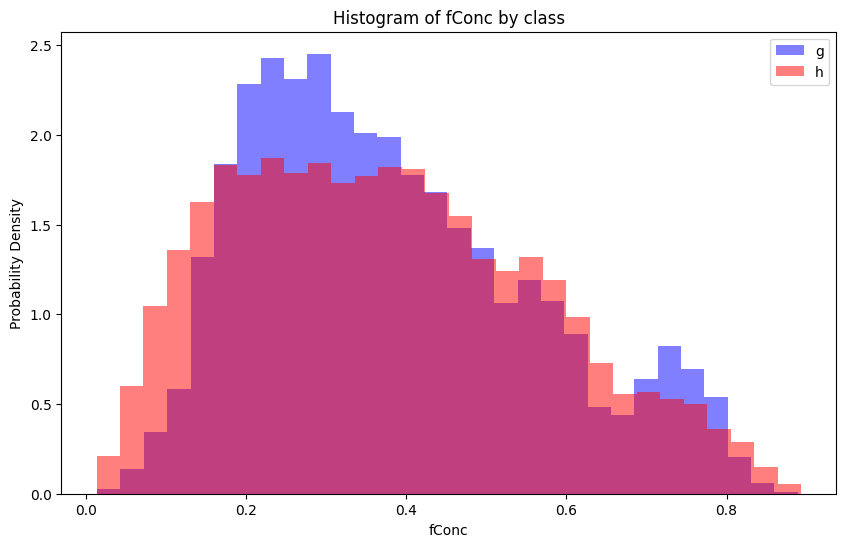

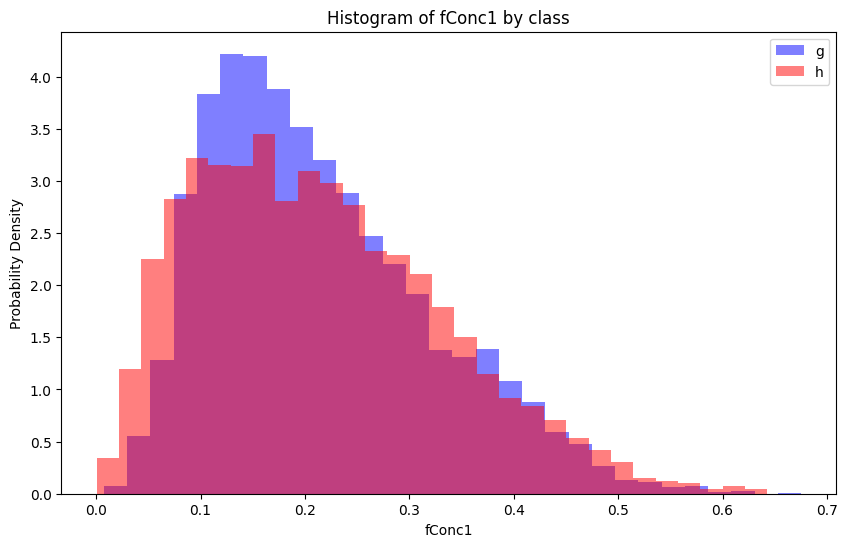

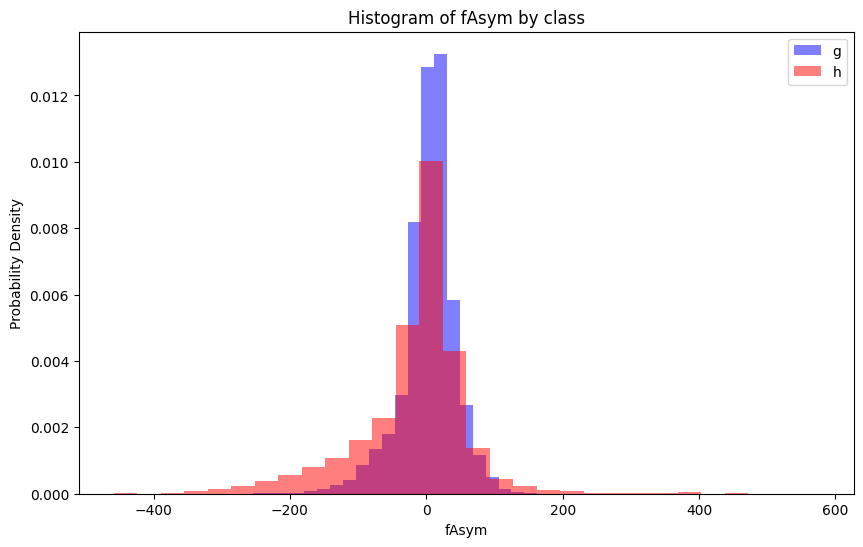

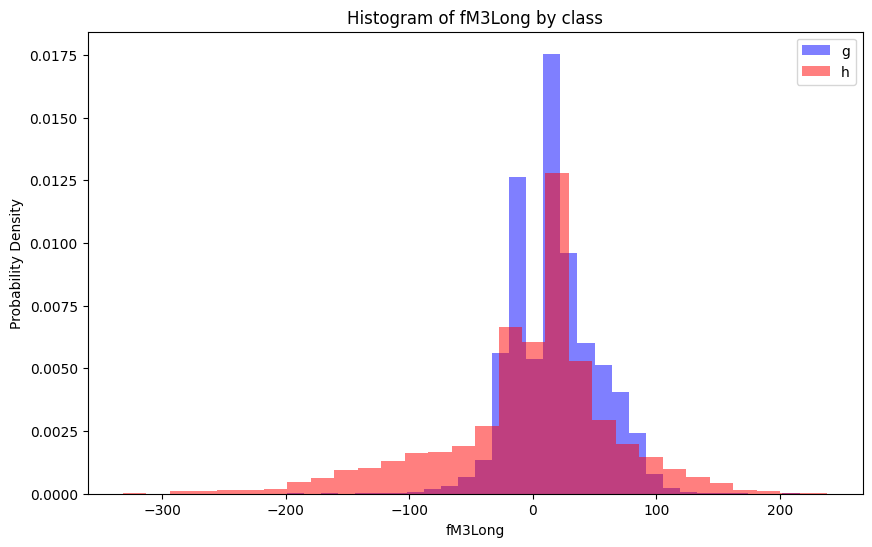

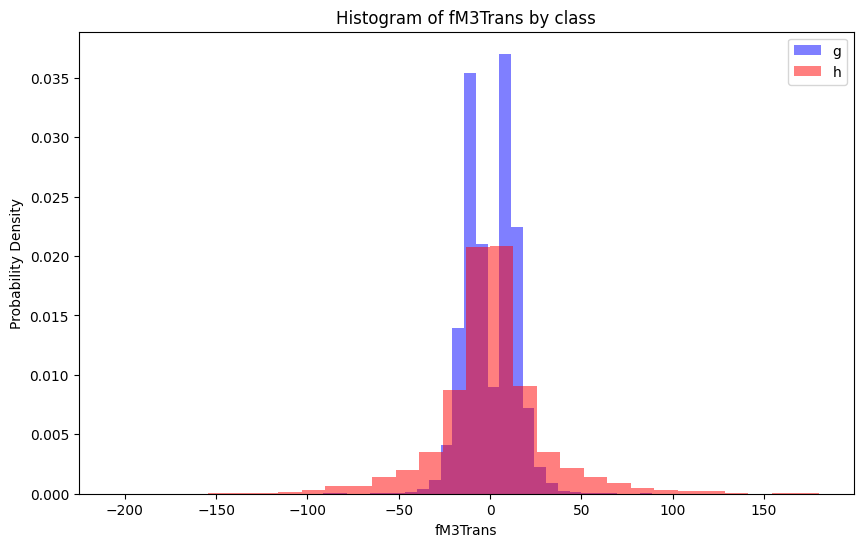

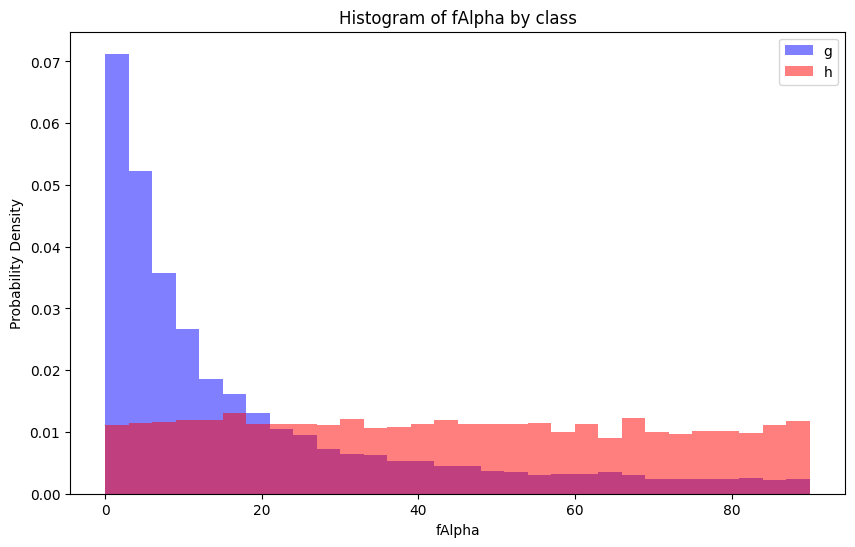

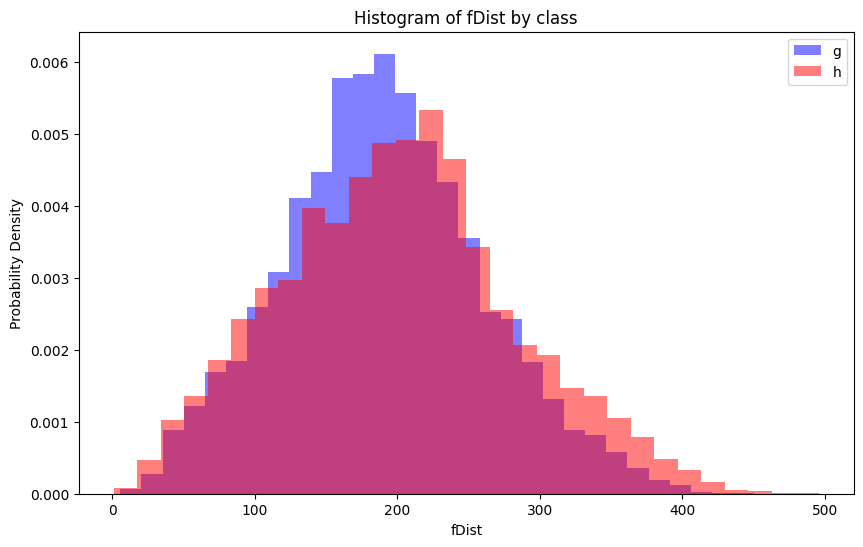

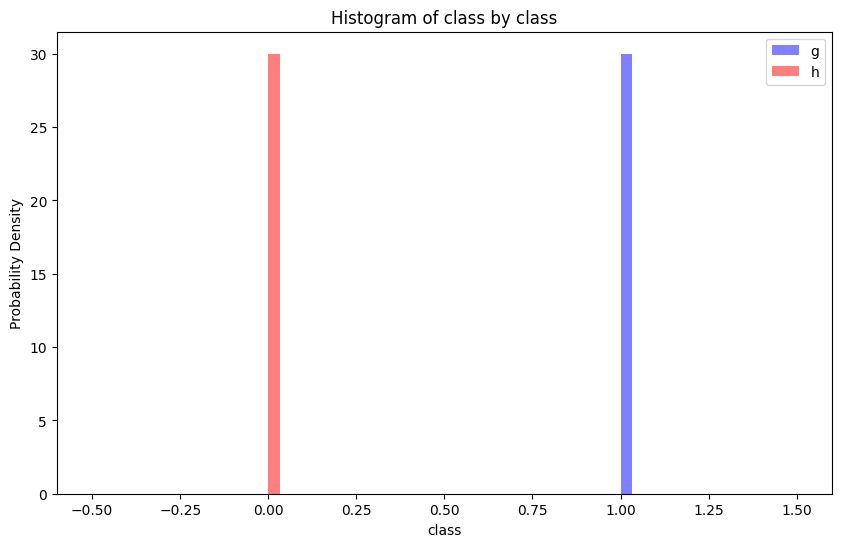

In [46]:
for label in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(
        df[df["class"] == 1][label],
        color="blue",
        alpha=0.5,
        label="g",
        density=True,
        bins=30,
    )
    plt.hist(
        df[df["class"] == 0][label],
        color="red",
        alpha=0.5,
        label="h",
        density=True,
        bins=30,
    )
    plt.title(f"Histogram of {label} by class")
    plt.xlabel(label)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

In [ ]:
# Train, validate and test
train, validate, test = np.split(
    df.sample(frac=1, random_state=42),  # shuffle the data
    [int(0.6 * len(df)), int(0.8 * len(df))],
)

c:\Users\ttcha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [59]:
def scale_data(df1: pd.DataFrame, oversample=False) -> pd.DataFrame:
    x = df1[df1.columns[:-1]].values  # all columns except the last one
    y = df1[df1.columns[-1]].values  # last column

    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # fit and transform the data

    if oversample:
        ros = RandomOverSampler(random_state=42)
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, y.reshape(-1, 1)))  # stack the data

    return data, x, y

In [ ]:
train, y_train, x_train = scale_data(train, oversample=True)
validate, y_train, x_train = scale_data(validate, oversample=False)
test, y_train, x_train = scale_data(test, oversample=False)